In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing CSV file
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
# Load FER2013 dataset
data = pd.read_csv("fer2013.csv")
#check data shape
data.shape

(35887, 3)

In [4]:
#check target labels
#emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotion_labels = {0:'Angry', 1:'Digust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Happy,8989
1,Neutral,6198
2,Sad,6077
3,Fear,5121
4,Angry,4953
5,Surprise,4002
6,Digust,547


/var/folders/1b/mjc8112x4452qqpf1zwfffkh0000gn/T/ipykernel_14268/1626966416.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

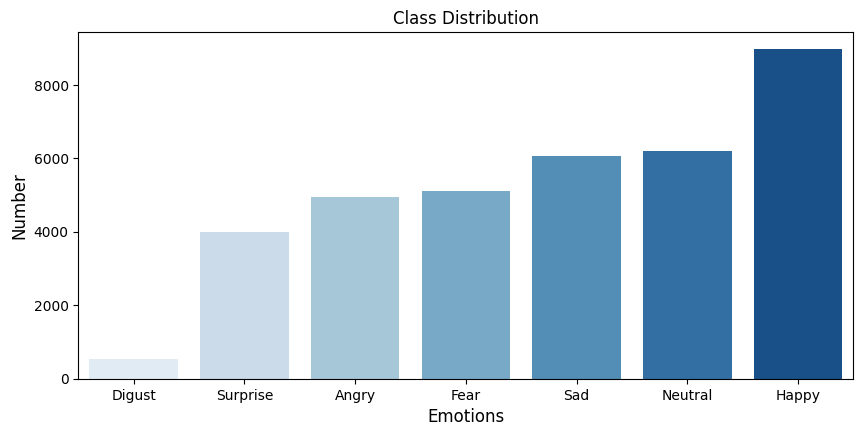

In [5]:
# Sort emotions by the number of images
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Generate a gradient of colors from light blue to blue
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

# Plotting the bar graph with sorted emotions and gradient colors
plt.figure(figsize=(10, 4.5))
sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
plt.title('Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

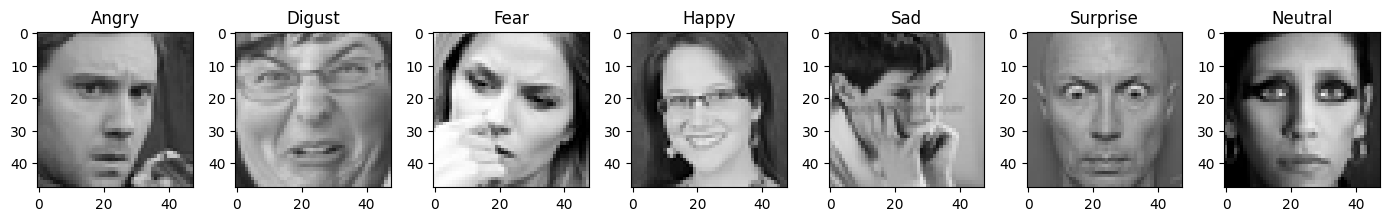

In [6]:
def row2image(row):
    pixels = row['pixels']
    emotion = emotion_labels[row['emotion']]
    img = np.array(pixels.split(), dtype=np.uint8)
    img = img.reshape(48, 48)
    # Repeat the single-channel image to create a three-channel image
    image = np.repeat(img[:, :, np.newaxis], 3, axis=2)
    return image, emotion

plt.figure(figsize=(14,9))
for i in range(1, 8):
    face = data[data['emotion'] == i-1].iloc[0]
    img, emotion = row2image(face)
    plt.subplot(1, 7, i)
    plt.imshow(img, cmap='gray')  # Plot grayscale image
    plt.title(emotion)
plt.tight_layout()
plt.show()

In [7]:
#split data into training, validation and test set
data_train = data[data['Usage']=='Training'].copy()
data_val   = data[data['Usage']=='PublicTest'].copy()
data_test  = data[data['Usage']=='PrivateTest'].copy()
print("train shape: {}, \nvalidation shape: {}, \ntest shape: {}".format(data_train.shape, data_val.shape, data_test.shape))

train shape: (28709, 3), 
validation shape: (3589, 3), 
test shape: (3589, 3)


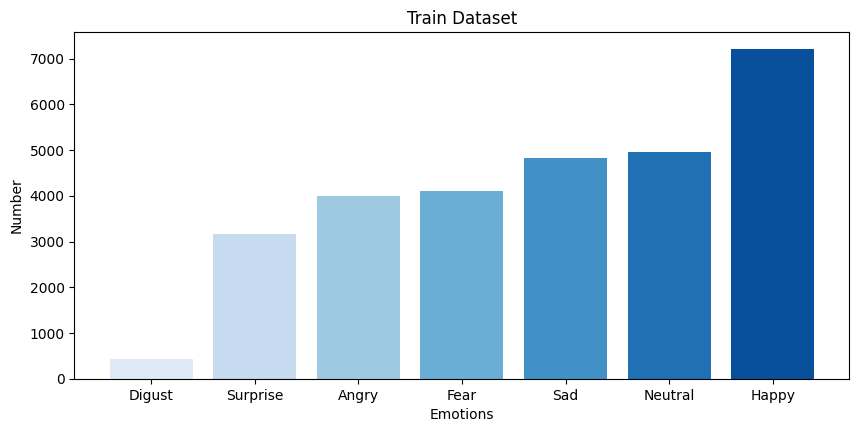

In [8]:
# Sort emotions by the number of images from high to low
train_emotion_counts_sorted = data_train['emotion'].value_counts().sort_values(ascending=True)

# Define a gradient of colors from light blue to blue
colors = sns.color_palette("Blues", n_colors=len(train_emotion_counts_sorted))

# Plot the bar plot for train data
plt.figure(figsize=(10, 4.5))
plt.bar(range(len(train_emotion_counts_sorted)), train_emotion_counts_sorted.values, color=colors)
plt.xticks(range(len(train_emotion_counts_sorted)), [emotion_labels[i] for i in train_emotion_counts_sorted.index])
plt.title('Train Dataset')
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.show()

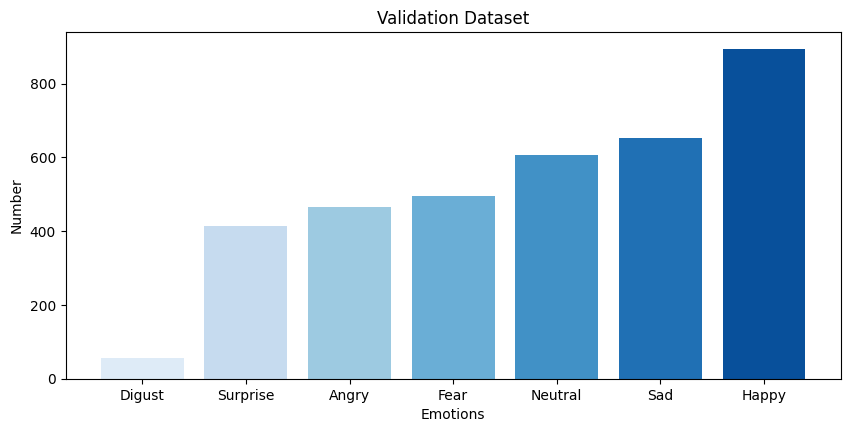

In [9]:
# Sort emotions by the number of images from high to low
val_emotion_counts_sorted = data_val['emotion'].value_counts().sort_values(ascending=True)

# Define a gradient of colors from light blue to blue
colors = sns.color_palette("Blues", n_colors=len(val_emotion_counts_sorted))

# Plot the bar plot for validation data
plt.figure(figsize=(10, 4.5))
plt.bar(range(len(val_emotion_counts_sorted)), val_emotion_counts_sorted.values, color=colors)
plt.xticks(range(len(val_emotion_counts_sorted)), [emotion_labels[i] for i in val_emotion_counts_sorted.index])
plt.title('Validation Dataset')
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.show()

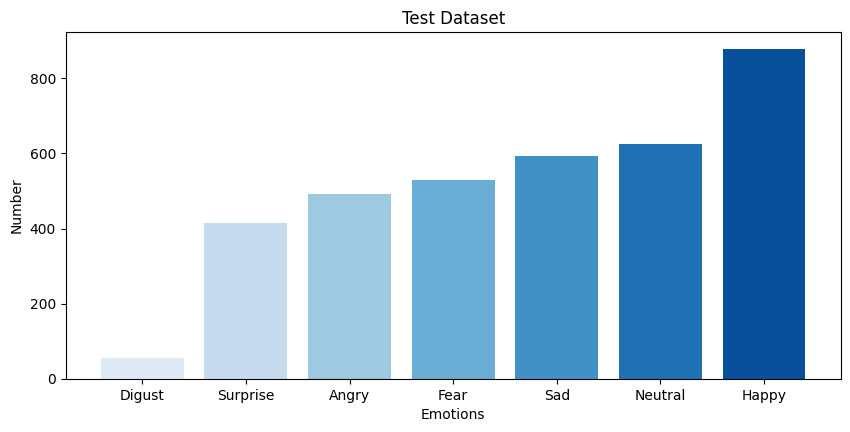

In [10]:
# Sort emotions by the number of images from high to low
test_emotion_counts_sorted = data_test['emotion'].value_counts().sort_values(ascending=True)

# Define a gradient of colors from light blue to blue
colors = sns.color_palette("Blues", n_colors=len(test_emotion_counts_sorted))

# Plot the bar plot for test data
plt.figure(figsize=(10, 4.5))
plt.bar(range(len(test_emotion_counts_sorted)), test_emotion_counts_sorted.values, color=colors)
plt.xticks(range(len(test_emotion_counts_sorted)), [emotion_labels[i] for i in test_emotion_counts_sorted.index])
plt.title('Test Dataset')
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.show()


In [11]:
x = []
for pixel_sequence in data["pixels"]:
    pixels = np.array(pixel_sequence.split(" "), dtype='uint8').reshape(48, 48, 1)
    x.append(pixels)
x = np.array(x) / 255.0  # Normalize pixel values
y = to_categorical(data["emotion"], num_classes = 7)

# Split dataset into train and test sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Define LeNet-5 model
model = Sequential()

# First convolutional  layer
# 6 filters, each with a 5x5 kernel, ReLU activation function
# Input shape: (48, 48, 1) - input images of size 48x48 pixels with 1 channel (grayscale)
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(48, 48, 1)))

# First max-pooling layer
# Max pooling with a 2x2 window size, reducing spatial dimensions by half
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer  
# 16 filters, each with a 5x5 kernel, ReLU activation function
model.add(layers.Conv2D(16, (5, 5), activation='relu'))

# Second max-pooling layer
# Max pooling with a 2x2 window size, reducing spatial dimensions by half
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to convert 2D feature maps to 1D feature vectors
model.add(layers.Flatten())

# First fully connected layer
# 120 vectors with activation function ReLu 
model.add(layers.Dense(120, activation='relu'))

# Second fully connected layer
# 84 neurons with activation function ReLu 
model.add(layers.Dense(84, activation="relu"))
 
# Output layer
# 7 neurons for classification (7 emotion classes), softmax activation for multiclass classification
model.add(layers.Dense(7, activation='softmax'))

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1296)              0         
                                                                 
 dense (Dense)               (None, 120)               1

In [13]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y, 
                    epochs = 30, 
                    batch_size = 48, 
                    validation_data = (test_x, test_y), 
                    verbose=1)

Epoch 1/30


2024-09-20 21:43:36.552206: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


599/599 [==============================] - 11s 17ms/step - loss: 1.6416 - accuracy: 0.3502 - val_loss: 1.5187 - val_accuracy: 0.4131
Epoch 2/30
599/599 [==============================] - 10s 17ms/step - loss: 1.4458 - accuracy: 0.4400 - val_loss: 1.4152 - val_accuracy: 0.4557
Epoch 3/30
599/599 [==============================] - 10s 16ms/step - loss: 1.3561 - accuracy: 0.4762 - val_loss: 1.3618 - val_accuracy: 0.4734
Epoch 4/30
599/599 [==============================] - 10s 16ms/step - loss: 1.2855 - accuracy: 0.5051 - val_loss: 1.3271 - val_accuracy: 0.4905
Epoch 5/30
599/599 [==============================] - 10s 16ms/step - loss: 1.2212 - accuracy: 0.5343 - val_loss: 1.3222 - val_accuracy: 0.5022
Epoch 6/30
599/599 [==============================] - 10s 16ms/step - loss: 1.1591 - accuracy: 0.5588 - val_loss: 1.3016 - val_accuracy: 0.5091
Epoch 7/30
599/599 [==============================] - 12s 20ms/step - loss: 1.1048 - accuracy: 0.5810 - val_loss: 1.3086 - val_accuracy: 0.5125
Epo

In [15]:
from sklearn.metrics import accuracy_score

# evaluate the test performance

# Convert one-hot encoded test labels back to categorical labels
test_true = np.argmax(test_y,axis=1)
# Predict the labels for the test data
test_pred = np.argmax(model.predict(test_x), axis = 1)
# Compute the accuracy score for the test data
# Print the test accuracy
print("Test Accuracy {:.2f}".format(accuracy_score(test_true, test_pred)*100))

# Evaluate the train performance

# Convert one-hot encoded train labels back to categorical labels
train_true = np.argmax(train_y,axis=1)
# Predict the labels for the train data
train_pred = np.argmax(model.predict(train_x), axis = 1)
# Compute the accuracy score for the train data
# Print the train accuracy
print("Train Accuracy {:.2f}".format(accuracy_score(train_true, train_pred)*100))

225/225 [==============================] - 1s 3ms/step
Test Accuracy 48.97
898/898 [==============================] - 4s 4ms/step
Train Accuracy 95.57


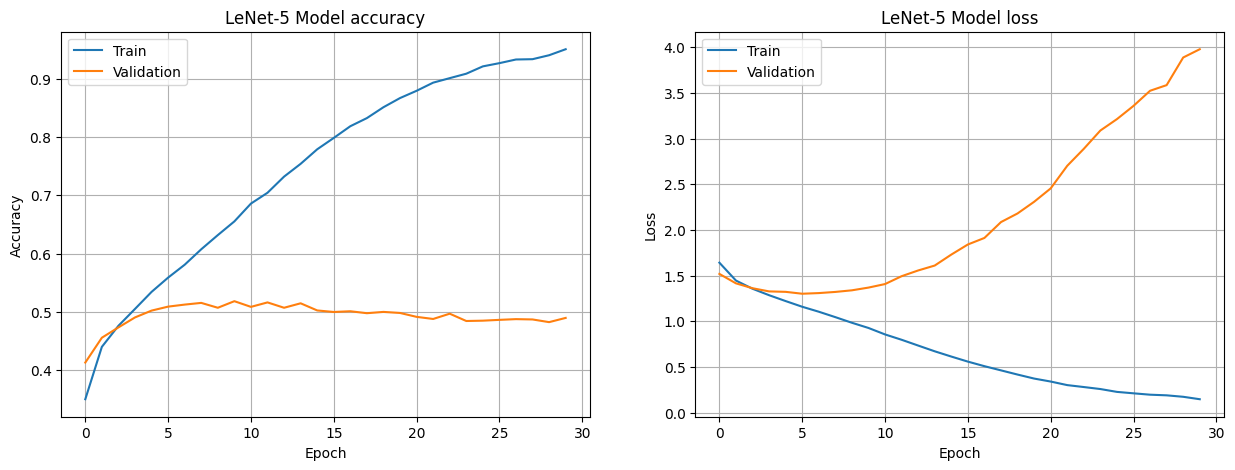

In [16]:
# Visualize training and validation metrics
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LeNet-5 Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LeNet-5 Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.show()

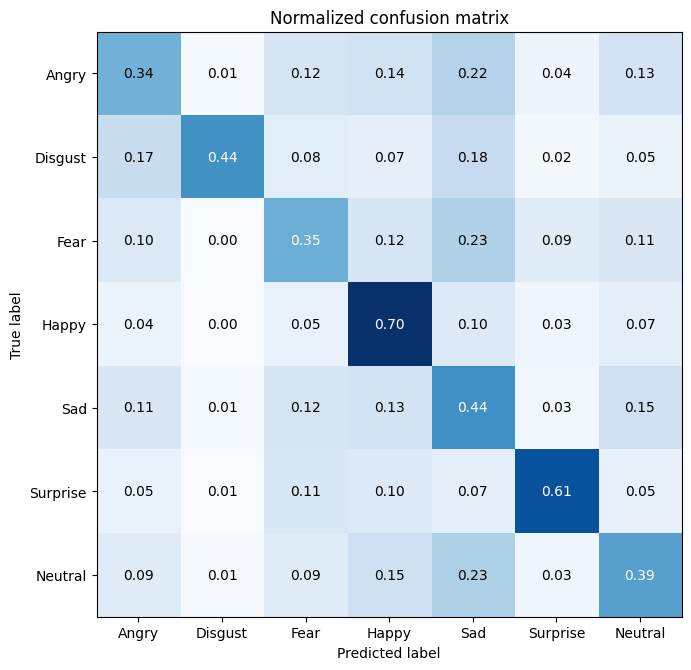

In [17]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = emotion_labels
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=emotion_labels, 
           yticklabels=emotion_labels,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="center",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot normalized confusion matrix
plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.show()

In [18]:
from sklearn.metrics import classification_report
from tabulate import tabulate

report = classification_report(test_true, test_pred, target_names=emotion_labels)
title='Classification Report'
# Center the title
title_length = len(title)
header = f"{'':^{title_length}}\n{title:^{title_length}}\n"

print(header)
print(report)

                     
Classification Report

              precision    recall  f1-score   support

       Angry       0.41      0.34      0.37       985
     Disgust       0.42      0.44      0.43       102
        Fear       0.39      0.35      0.37      1043
       Happy       0.64      0.70      0.67      1765
         Sad       0.35      0.44      0.39      1210
    Surprise       0.64      0.61      0.63       795
     Neutral       0.46      0.39      0.42      1278

    accuracy                           0.49      7178
   macro avg       0.47      0.47      0.47      7178
weighted avg       0.49      0.49      0.49      7178

